Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [3]:
NICKNAME = "nazar-si"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate

plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [8]:
def getSphereVolumeExact(D, R = 1.0):
    return np.pi ** (D / 2) / sp.gamma(1 + D / 2) * R ** D

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

V_1 = 2; V(1) = 2.0
V_2 = pi; V(2) / pi = 1.0
V_3 = 4 pi / 3; V(3) * 3 / pi =  4.0
Верно для трех известных объемов


Text(0, 0.5, 'Объем единичной сферы')

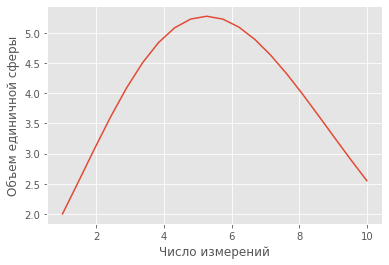

In [17]:
print("V_1 = 2;", "V(1) =", getSphereVolumeExact(1))
print("V_2 = pi;", "V(2) / pi =", getSphereVolumeExact(2) / np.pi)
print("V_3 = 4 pi / 3;", "V(3) * 3 / pi = ", getSphereVolumeExact(3) / np.pi * 3)
print("Верно для трех известных объемов")

sample = np.linspace(1, 10, 20)

plt.plot(sample, getSphereVolumeExact(sample))
plt.xlabel("Число измерений")
plt.ylabel("Объем единичной сферы")

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [140]:
def getSphereVolumePseudorandom(N, D, R = 1):
    s = (2 * np.random.rand(N, D) - 1)
    V = np.sum(s ** 2 @ np.ones((D, 1)) < 1 ) / N * (2 * R) ** D
    return V


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

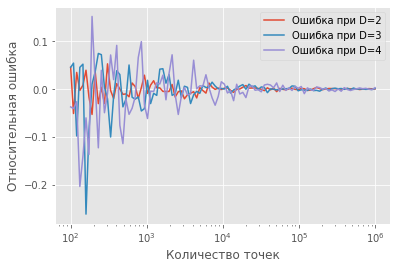

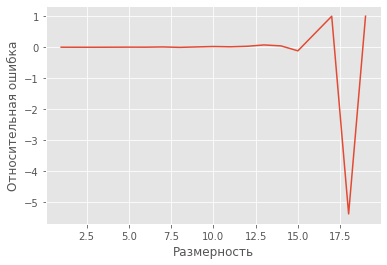

In [141]:
plt.xscale("log")
for D in range(2, 5):
    V_ex = getSphereVolumeExact(D)
    n = np.int64(np.logspace(2, 6, 100))
    
    plt.plot(n, (V_ex - np.array([getSphereVolumePseudorandom(n_, D) for n_ in n])) / V_ex, label=f"Ошибка при D={D}")

n = 10 ** 6 
D = np.arange(1, 20, 1)


plt.legend()
plt.xlabel("Количество точек")
plt.ylabel("Относительная ошибка")
plt.show()

plt.plot(D, [(getSphereVolumeExact(d) - getSphereVolumePseudorandom(n, d)) / getSphereVolumeExact(d) for d in D])
plt.xlabel("Размерность")
plt.ylabel("Относительная ошибка")
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [128]:
%pip install sobol_seq 
import sobol_seq

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [129]:
sobol_seq.i4_sobol_generate?

Signature: sobol_seq.i4_sobol_generate(dim_num, n, skip=0)
Docstring:
i4_sobol_generate generates a Sobol dataset.

Parameters:
  Input, integer dim_num, the spatial dimension.
  Input, integer N, the number of points to generate.
  Input, integer SKIP, the number of initial points to skip.

  Output, real R(M,N), the points.
File:      c:\users\technodx\appdata\local\programs\python\python310\lib\site-packages\sobol_seq\sobol_seq.py
Type:      function


In [147]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    s = sobol_seq.i4_sobol_generate(D, N)
    V = np.sum(s ** 2 @ np.ones((D, 1)) < 1 ) / N * (2 * R) ** D
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

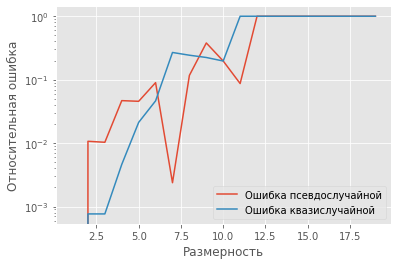

In [163]:
n = 10 ** 3
D = np.arange(1, 20, 1)

e_p = np.array([(getSphereVolumeExact(d) - getSphereVolumePseudorandom(n, d)) / getSphereVolumeExact(d) for d in D])
e_q = np.array([(getSphereVolumeExact(d) - getSphereVolumeQuasirandom(n, d)) / getSphereVolumeExact(d) for d in D])

plt.yscale("log")
plt.plot(D, np.abs(e_p), label="Ошибка псевдослучайной")
plt.plot(D, np.abs(e_q), label="Ошибка квазислучайной")

plt.xlabel("Размерность")
plt.ylabel("Относительная ошибка")
plt.legend()
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Ошибка для квазислучайных чисел в большей части случаев аналогична ошибке псевдослучайных, но при этом она отличается стабильностью (растет более монотонно с числом измерении) и не имеет резких выбросов значений, которые могут произойти в случае с псевдослучайными значениям (лучше было видно при небольших n). 

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

Реально его можно вычислить через распределение Максвелла и формулу площади d-мерной сферы:
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}} = \int_0^\infty S_d\, dr \frac{r^{d-1}e^{-r^2}}{1 + r^2}
$$

In [192]:
f = lambda x, d: 1 / ( 1 + x ** 2 @ np.ones((d, 1)) )
D = np.arange(1, 6, 1)
n = 10**5

# площадь единичной сферы:
def S(D):
    return 2 * np.pi ** (d / 2) / sp.gamma( d / 2 )


for d in D:
    distr = np.random.normal(0, 2 ** (-0.5), (n, d))
    s = np.sum([f(p, d) for p in distr]) / n

    # реальный через распределение Максвелла 
    real = integrate.quad(lambda x: np.exp(-x ** 2) * x ** (d - 1) / (1 + x ** 2) * S(d), 0, np.inf)[0]
    # наш: 
    I = s * np.pi ** ( d / 2 )
    error = abs(I - real) / real

    print(f"D = {d}, I = {str(np.round(I, 8)).center(10)}, Real I = {str(np.round(real, 10)).center(12)}, Error = {str(np.round(error, 8))}")
    



D = 1, I = 1.34482978, Real I = 1.3432934216, Error = 0.00114372
D = 2, I = 1.87616875, Real I = 1.8734804925, Error = 0.0014349
D = 3, I = 2.69874395, Real I = 2.6964945035, Error = 0.00083421
D = 4, I = 3.98024053, Real I = 3.9838918493, Error = 0.00091652
D = 5, I = 6.0261947 , Real I = 6.0147540032, Error = 0.00190211


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [218]:
# сделал в формате генератора 

def getSample(N):
    f = lambda x: np.sqrt(1 - x ** 2)
    sample = []
    
    for k in range(N):
        while (y := np.random.uniform(0,1)) > f(x := np.random.uniform(-1,1)):
            pass
        yield x

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

c:\Users\TechnoDX\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


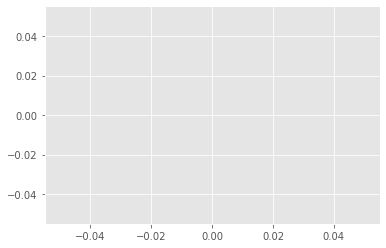

In [220]:
plt.hist(list(getSample(10 ** 5)), 50, density=True)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [ ]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [ ]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [ ]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [ ]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [ ]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    # YOUR CODE HERE
    raise NotImplementedError()
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [ ]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

In [ ]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

YOUR ANSWER HERE

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [ ]:
N = 64
state = getInitialState(N)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state)
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE